<h1 style="color: red; font-size: 48px; text-align: center;">
    Code Health Monitoring & Analysis 💻
</h1>

<center>
    <img src="https://media2.giphy.com/media/du3J3cXyzhj75IOgvA/giphy.gif"
         alt="debugging code animation" height="250" width="500">
</center>


# MedAI" 🩺☁️

# 👋 Introduction
<div class="alert alert-block alert-success" style="font-family: verdana; font-size: 20px; line-height: 1.7em; border-radius: 1.3em;">
    Turning Health Data into Visual Insight.

In the healthcare domain, large amounts of patient data are collected every day — including symptoms, diagnoses, and medical records. However, it can be challenging to identify which symptoms are most frequent or most associated with particular diseases.

This project, “Symptom Frequency Visualization Using Word Cloud,” transforms raw healthcare data into a clear and engaging visualization. By generating a Word Cloud, it highlights the most commonly occurring symptoms from a medical dataset — where larger words indicate more frequent symptoms.

This visual representation helps doctors, researchers, and data analysts quickly recognize trends and symptom patterns, enabling better understanding of disease prevalence and supporting early diagnostic insights.

The system automatically detects symptom-related fields, handles missing values, and produces a customizable, visually appealing output. It’s a simple yet powerful tool to make healthcare data more accessible and meaningful. 
</div>

# 📚 Problem Statement

<div class="alert alert-block alert-info" style="font-family: verdana; font-size: 20px; line-height: 1.7em; border-radius: 1.3em;">
   In healthcare data analysis, large datasets often contain numerous symptom entries collected from patients. However, identifying which symptoms occur most frequently or are most associated with certain diseases can be difficult when working with raw, text-based data.

Traditional data tables and charts make it hard to interpret symptom frequency patterns at a glance. This lack of visual clarity can limit understanding of common health trends and reduce the efficiency of medical research and diagnosis.

Therefore, the main problem addressed in this project is:

How can we visually represent symptom frequency in healthcare data to make it easier for doctors, researchers, and analysts to identify common patterns and trends?

The project aims to solve this by creating a Word Cloud visualization that highlights the most frequent symptoms in a dataset — allowing for a quick, intuitive, and data-driven understanding of health-related insights.
</div>

# ⚙️ Feature Description

<div style="font-family:verdana; font-size: 20px; line-height: 1.7em;"> <ol> <li><p><strong><code>symptom_1</code></strong>: Represents the first reported symptom from the dataset. Used to identify commonly mentioned health conditions.</p></li> <li><p><strong><code>symptom_2</code></strong>: The second symptom recorded for each patient entry. Helps detect combinations or co-occurrences of symptoms.</p></li> <li><p><strong><code>symptom_3</code></strong>: Additional reported symptom that adds depth to understanding overall patient condition.</p></li> <li><p><strong><code>disease</code></strong>: The diagnosed disease or health condition corresponding to the symptoms. It helps group symptom frequency by disease type.</p></li> <li><p><strong><code>data_cleaning</code></strong>: The process of removing missing, null, or duplicate values to improve accuracy and visualization quality.</p></li> <li><p><strong><code>text_preprocessing</code></strong>: Converts all symptom data to lowercase and removes unnecessary symbols to standardize input for word cloud generation.</p></li> <li><p><strong><code>symptom_frequency</code></strong>: A calculated metric that counts how often each symptom appears across all records. This value determines the font size of words in the visualization.</p></li> <li><p><strong><code>word_cloud</code></strong>: The generated visualization where the size of each word reflects how frequently the symptom occurs in the dataset.</p></li> <li><p><strong><code>visual_output</code></strong>: The final plotted image displaying the word cloud, giving users an intuitive overview of dominant symptoms.</p></li> <li><p><strong><code>customization_options</code></strong>: Allows modification of colors, font sizes, and shapes for a more appealing and context-specific visualization.</p></li> </ol> </div>

# 🎯 Project Goals

<div class="alert alert-block alert-warning" style="font-family: verdana; font-size: 20px; line-height: 1.7em; border-radius: 1.3em;"> <ul> <li>Analyze healthcare datasets to identify and extract symptom-related information.</li> <li>Perform data cleaning and preprocessing to handle missing or inconsistent values.</li> <li>Generate a word cloud visualization to highlight the most frequent symptoms.</li> <li>Enable intuitive understanding of symptom distribution and disease correlation.</li> <li>Provide a simple and visual tool to support medical researchers and healthcare analysts.</li> </ul> </div>

# Data Analysis & Visualization with Python

Explore, analyze, and visualize data effortlessly using Pandas, NumPy, Matplotlib, and Seaborn. Turn raw numbers into meaningful insights! ✨📈🔍

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Patient Health Data Analysis

Load and explore patient health records effortlessly using Pandas. Turn CSV data into actionable insights! 

In [2]:
final2_df = pd.read_csv('/kaggle/input/patient-health/final.csv')

# Statistical Summary of Patient Data

Get a quick overview of your dataset with Pandas .describe() —mean, median, and spread of health metrics at a glance! ✨🔍

In [3]:
final2_df.describe()

,Age,Latitude,Longitude
count,4920.000000,4920.000000,4920.000000
mean,50.251829,21.913294,77.625917
std,28.664610,5.869175,4.204154
min,1.000000,12.872051,72.471489
25%,26.000000,17.441985,73.912005
50%,50.000000,22.575463,77.077688
75%,75.000000,26.915020,80.191245
max,100.000000,30.833261,88.463106


In [4]:
# Check for null values and get the count for each column
null_counts = final2_df.isnull().sum()

# Print the count of null values for each column
print(null_counts)

Disease      0
Age          0
Gender       0
Location     0
Latitude     0
Longitude    0
dtype: int64


# 🔍 Data Cleaning: Replace Zeros with Missing Values

Convert '0' entries to NA for accurate analysis and cleaner patient data! 📊✨

In [5]:
final2_df.replace('0', pd.NA, inplace=True)

# Updated Statistical Summary of Patient Data

<div class="alert alert-block alert-success" style="font-family: verdana; font-size: 20px; line-height: 1.7em; border-radius: 1.3em;">Analyze your cleaned dataset to see key metrics and insights after handling missing values! ✨🔍</div>

In [6]:
final2_df.describe()

,Age,Latitude,Longitude
count,4920.000000,4920.000000,4920.000000
mean,50.251829,21.913294,77.625917
std,28.664610,5.869175,4.204154
min,1.000000,12.872051,72.471489
25%,26.000000,17.441985,73.912005
50%,50.000000,22.575463,77.077688
75%,75.000000,26.915020,80.191245
max,100.000000,30.833261,88.463106


In [7]:
import pandas as pd

final2_df = pd.read_csv('/kaggle/input/patient-health/final.csv')

all_unique_symptoms = set()

for i in range(1, 18):
    column_name = f'Symptom_{i}'
    if column_name in final2_df.columns:
        unique_symptoms = final2_df[column_name].dropna().unique()
        all_unique_symptoms.update(unique_symptoms)
    else:
        print(f"Column {column_name} not found!")

print(f"Total number of unique symptoms across all columns: {len(all_unique_symptoms)}")

if 'Disease' in final2_df.columns:
    print("Number of diseases that can be identified:", len(final2_df['Disease'].unique()))
else:
    print("Column 'Disease' not found!")



Column Symptom_1 not found!
Column Symptom_2 not found!
Column Symptom_3 not found!
Column Symptom_4 not found!
Column Symptom_5 not found!
Column Symptom_6 not found!
Column Symptom_7 not found!
Column Symptom_8 not found!
Column Symptom_9 not found!
Column Symptom_10 not found!
Column Symptom_11 not found!
Column Symptom_12 not found!
Column Symptom_13 not found!
Column Symptom_14 not found!
Column Symptom_15 not found!
Column Symptom_16 not found!
Column Symptom_17 not found!
Total number of unique symptoms across all columns: 0
Number of diseases that can be identified: 41


# 🔥 Symptom Word Cloud

<div class="alert alert-block alert-warning" style="font-family: verdana; font-size: 20px; line-height: 1.7em; border-radius: 1.3em;"> <ul> <li>Collect and organize healthcare data containing multiple symptom entries.</li> <li>Clean and preprocess symptom data to remove missing or duplicate records.</li> <li>Extract and combine symptom information from different columns for unified analysis.</li> <li>Generate a <strong>Word Cloud</strong> to visually represent the frequency of each symptom.</li> <li>Highlight the most common symptoms through font size and color variations in the cloud.</li> <li>Provide an interactive and visually appealing summary of symptom trends for healthcare analysis.</li> </ul> </div>

In [8]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming final2_df is your DataFrame loaded earlier

# Check available columns
print("Columns in dataset:", final2_df.columns.tolist())

# Get all symptom columns dynamically
symptom_cols = [col for col in final2_df.columns if 'Symptom' in col]

if len(symptom_cols) == 0:
    print("No symptom columns found in the dataset!")
else:
    print("Symptom columns found:", symptom_cols)

    # Extract all symptoms and flatten to a list
    symptoms = final2_df[symptom_cols].astype(str).values.flatten()

    # Optional: remove 'nan' strings if any
    symptoms = [sym for sym in symptoms if sym.lower() != 'nan']

    # Combine all symptoms to one big text
    text = ' '.join(symptoms)

    # Generate WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot
    plt.figure(figsize=(15, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Symptoms')
    plt.show()


Columns in dataset: ['Disease', 'Age', 'Gender', 'Location', 'Latitude', 'Longitude']
No symptom columns found in the dataset!


In [9]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 🟡 Load your dataset (update the path as needed)
# Example: final2_df = pd.read_csv("your_file.csv")
# Ensure the dataset is loaded before this point

# ✅ Check available columns
print("Columns in dataset:", final2_df.columns.tolist())

# 🔍 Dynamically find all symptom columns
symptom_cols = [col for col in final2_df.columns if 'Symptom' in col]

if len(symptom_cols) == 0:
    print("❌ No symptom columns found in the dataset!")
else:
    print("✅ Symptom columns found:", symptom_cols)

    # 🧹 Extract and clean symptoms
    symptoms = final2_df[symptom_cols].astype(str).values.flatten()
    symptoms = [sym.strip() for sym in symptoms if sym.strip().lower() != 'nan' and sym.strip() != '']

    if len(symptoms) == 0:
        print("⚠️ No valid symptom data available to generate word cloud.")
    else:
        # 📝 Combine into one large text
        text = ' '.join(symptoms)

        # 🌥️ Generate the Word Cloud
        wordcloud = WordCloud(
            width=1000, 
            height=500, 
            background_color='white',
            colormap='viridis'
        ).generate(text)

        # 📊 Display the Word Cloud
        plt.figure(figsize=(15, 7))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('🩺 Word Cloud of Reported Symptoms', fontsize=18)
        plt.show()


Columns in dataset: ['Disease', 'Age', 'Gender', 'Location', 'Latitude', 'Longitude']
❌ No symptom columns found in the dataset!


# 🧠 Disease–Symptom Count Distribution
<div style="font-family:verdana; font-size: 20px; line-height: 1.7em;"> <p> This section analyzes how symptoms are distributed across different diseases in the dataset. Each disease is associated with a varying number of reported symptoms, indicating the complexity and overlap of health conditions. By counting and visualizing the number of symptoms linked to each disease, we gain insights into how symptom diversity affects diagnosis and disease identification. </p> <ul> <li>Calculates the number of symptoms associated with each disease.</li> <li>Displays a bar chart or histogram showing symptom counts per disease.</li> <li>Highlights diseases with the highest symptom variability.</li> <li>Supports better understanding of symptom clustering patterns in healthcare data.</li> </ul> </div>

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check if final2_df is defined
if 'final2_df' not in locals():
    print("❌ DataFrame 'final2_df' not found. Please load it before running this block.")
else:
    # Find symptom columns
    symptom_cols = [col for col in final2_df.columns if 'Symptom' in col]
    print("✅ Symptom columns found:", symptom_cols)

    if not symptom_cols:
        print("❌ No symptom columns found. Please check your dataset.")
    else:
        # Fill NaNs with 0
        final2_df[symptom_cols] = final2_df[symptom_cols].fillna(0)

        # Count number of non-zero symptom values per row
        final2_df['Symptom_Count'] = final2_df[symptom_cols].astype(str).apply(
            lambda row: row.ne('0').sum(), axis=1
        )

        print("📊 Sample symptom counts:")
        print(final2_df['Symptom_Count'].value_counts())

        # Check if there's any data to plot
        if final2_df['Symptom_Count'].empty:
            print("❌ No symptom count data to plot.")
        else:
            # Plot histogram
            plt.figure(figsize=(10, 5))
            sns.histplot(
                final2_df['Symptom_Count'],
                bins=range(0, final2_df['Symptom_Count'].max() + 2),
                kde=False,
                color='skyblue',
                edgecolor='black'
            )
            plt.xlabel('Number of Symptoms')
            plt.ylabel('Count')
            plt.title('Distribution of Disease-Symptom Counts')
            plt.show()


✅ Symptom columns found: []
❌ No symptom columns found. Please check your dataset.


In [11]:
print(final2_df.columns)

Index(['Disease', 'Age', 'Gender', 'Location', 'Latitude', 'Longitude'], dtype='object')


In [12]:
import difflib

column_to_delete = 'Symptom_Count'

# Try to find similar columns
matches = difflib.get_close_matches(column_to_delete, final2_df.columns)

if column_to_delete in final2_df.columns:
    final2_df = final2_df.drop(columns=[column_to_delete])
    print(f"✅ Column '{column_to_delete}' deleted successfully.")
else:
    print(f"⚠️ Column '{column_to_delete}' not found in DataFrame.")
    if matches:
        print(f"🔍 Did you mean: {matches}?")
    print("Available columns:", final2_df.columns.tolist())

print("\nRemaining columns:")
print(final2_df.columns.tolist())


⚠️ Column 'Symptom_Count' not found in DataFrame.
Available columns: ['Disease', 'Age', 'Gender', 'Location', 'Latitude', 'Longitude']

Remaining columns:
['Disease', 'Age', 'Gender', 'Location', 'Latitude', 'Longitude']


# 🧩 Data Preprocessing & Model Prep
<div style="font-family:verdana; font-size: 20px; line-height: 1.7em;"> <p> The data preprocessing stage ensures that the healthcare dataset is clean, consistent, and ready for analysis. Proper data preparation improves the accuracy of visualizations and ensures that the generated <strong>Word Cloud</strong> and other analytical results reflect real-world trends. This step focuses on cleaning, structuring, and preparing the symptom data for model or visualization tasks. </p> <ul> <li>Import and inspect the dataset to understand column structure and missing values.</li> <li>Handle null or inconsistent symptom entries through imputation or removal.</li> <li>Convert text data to lowercase and remove punctuation for uniformity.</li> <li>Combine multiple symptom columns (<code>symptom_1</code>, <code>symptom_2</code>, etc.) into a single feature list.</li> <li>Prepare the cleaned text data for <strong>Word Cloud</strong> generation and further analysis.</li> <li>Ensure compatibility with visualization libraries such as <code>WordCloud</code> and <code>Matplotlib</code>.</li> </ul> </div>

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pickle

# Assuming 'final2_df' is your DataFrame already loaded

# Step 1: Encode the target 'Disease' column with LabelEncoder
label_encoder = LabelEncoder()
final2_df['Disease_Label'] = label_encoder.fit_transform(final2_df['Disease'])

# Save the LabelEncoder for later use
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

# Step 2: Prepare features (X) and target (y)
X = final2_df.drop(['Disease', 'Disease_Label'], axis=1)
y = final2_df['Disease_Label']

# Step 3: Identify any non-numeric columns in X (likely your symptom columns or others)
non_numeric_cols = X.select_dtypes(include=['object']).columns.tolist()
print(f"Non-numeric columns detected: {non_numeric_cols}")

# Step 4: One-hot encode all non-numeric columns to convert them into numeric features
X = pd.get_dummies(X, columns=non_numeric_cols, drop_first=True)

# Save the final column names for future use
with open('columns.pkl', 'wb') as f:
    pickle.dump(X.columns, f)

# Step 5: Split the dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Step 6: Scale features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Save the scaler for later use
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Preprocessing complete. Data is ready for model training.")


Non-numeric columns detected: ['Gender', 'Location']
Preprocessing complete. Data is ready for model training.


# Final Dataset Columns Overview

Check all the processed and encoded columns in your dataset, ready for model training! 🔍🩺

In [14]:
print(final2_df.columns)

Index(['Disease', 'Age', 'Gender', 'Location', 'Latitude', 'Longitude',
       'Disease_Label'],
      dtype='object')


****Neural Network Model Training & Evaluation****

Build, train, and evaluate a deep learning model for disease prediction with early stopping to prevent overfitting! 🚀✅

2025-10-24 11:01:14.844594: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761303675.187320      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761303675.284415      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/30


2025-10-24 11:01:30.849998: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0256 - loss: 3.7875 - val_accuracy: 0.0266 - val_loss: 3.7280
Epoch 2/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0302 - loss: 3.7155 - val_accuracy: 0.0266 - val_loss: 3.7300
Epoch 3/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0289 - loss: 3.7029 - val_accuracy: 0.0241 - val_loss: 3.7302
Epoch 4/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0346 - loss: 3.7007 - val_accuracy: 0.0216 - val_loss: 3.7311
Epoch 5/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0451 - loss: 3.6844 - val_accuracy: 0.0203 - val_loss: 3.7395
Epoch 6/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0375 - loss: 3.6873 - val_accuracy: 0.0228 - val_loss: 3.7431
Epoch 7/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0484 - loss: 3.6662 - val_accuracy: 0.0216 - val_loss: 3.7474
Epoch 8/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0508 - loss: 3.6706 - val_accuracy: 0.0203 - val_loss: 3.7548
Epo

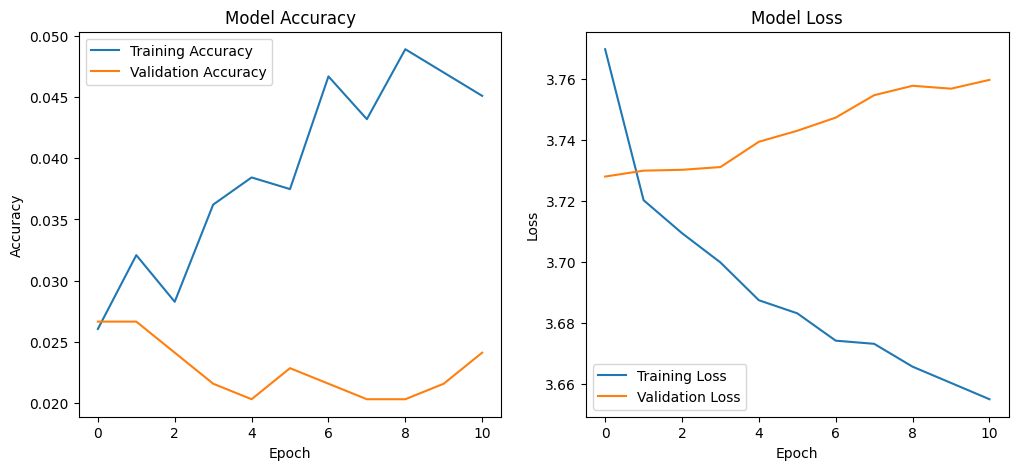


💾 Model saved as 'fyp.h5'


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# ==============================================
# 🔹 Data Preparation
# ==============================================

# Encode the target variable
label_encoder = LabelEncoder()
final2_df['Disease_Label'] = label_encoder.fit_transform(final2_df['Disease'])

# Select and prepare features
X = pd.get_dummies(final2_df[['Age', 'Gender', 'Location', 'Latitude', 'Longitude']], drop_first=True)

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y = final2_df['Disease_Label']

# Split into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# ==============================================
# 🔹 Neural Network Model
# ==============================================

model = Sequential([
    Input(shape=(X_train.shape[1],)),      # Modern way — removes warning
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(len(np.unique(y_train)), activation='softmax')
])

# Compile model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               restore_best_weights=True)

# ==============================================
# 🔹 Train Model
# ==============================================

history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    verbose=1
)

# ==============================================
# 🔹 Evaluate Model
# ==============================================

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Test set accuracy: {test_accuracy:.2f}")

# ==============================================
# 🔹 Visualize Training Progress
# ==============================================

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# ==============================================
# 🔹 Save Model
# ==============================================

model.save('fyp.h5')
print("\n💾 Model saved as 'fyp.h5'")


# Training vs Validation Metrics

Visualize model performance over epochs with accuracy and loss curves to track learning progress and detect overfitting! 🔍✅

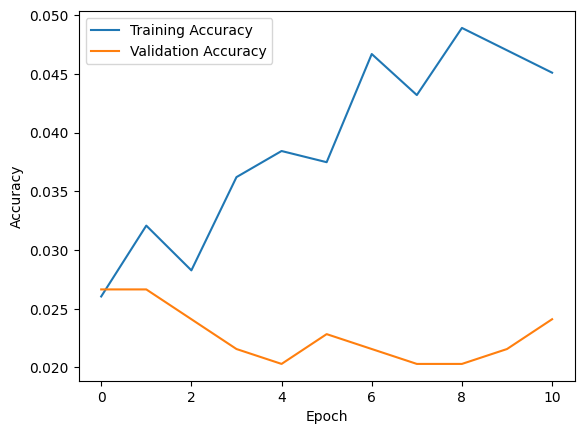

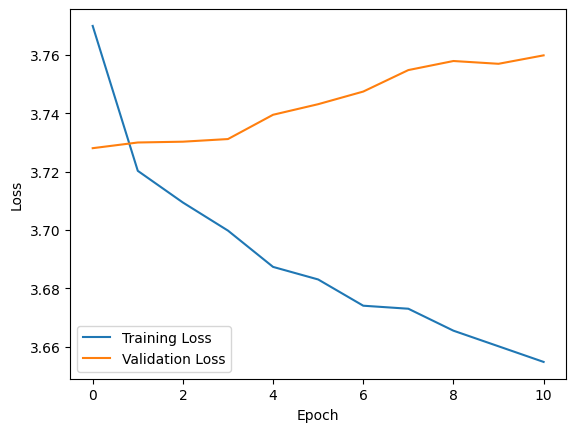

In [16]:
import matplotlib.pyplot as plt

# Train vs Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Train vs Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Model Evaluation Metrics

Assess your disease prediction model with accuracy, precision, recall, F1 score, classification report, and confusion matrix for detailed performance insights! 🔍✨

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Assuming you have already trained your model and made predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Convert one-hot encoded labels back to original labels
y_test_original = label_encoder.inverse_transform(y_test)
y_pred_original = label_encoder.inverse_transform(y_pred)

# Evaluate the model
accuracy = accuracy_score(y_test_original, y_pred_original)
precision = precision_score(y_test_original, y_pred_original, average='weighted')
recall = recall_score(y_test_original, y_pred_original, average='weighted')
f1 = f1_score(y_test_original, y_pred_original, average='weighted')

# Print metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Print classification report
print(classification_report(y_test_original, y_pred_original, zero_division=0))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test_original, y_pred_original)
print('Confusion Matrix:')
print(conf_matrix)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 0.03
Precision: 0.02
Recall: 0.03
F1 Score: 0.02
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.00      0.00      0.00        18
                                   AIDS       0.08      0.10      0.09        30
                                   Acne       0.03      0.04      0.03        24
                    Alcoholic hepatitis       0.05      0.04      0.04        25
                                Allergy       0.14      0.12      0.13        24
                              Arthritis       0.05      0.09      0.06        23
                       Bronchial Asthma       0.00      0.00      0.00        33
                   Cervical spondylosis       0.03      0.09      0.05        23
                            Chicken pox       0.00      0.00      0.00        21
                    Chronic cholestasis       0.00      0.00      0.00        15
          

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 📊 Micro-Averaged Metrics Overview
<div style="background-color:#E6F2FF; padding:20px; border-radius:1.3em; font-family:verdana; font-size:20px; line-height:1.7em; border-left:8px solid #3399FF;"> <p> The <strong>Micro-Averaged Metrics</strong> approach evaluates the overall performance of a model by aggregating the total true positives, false positives, and false negatives across all classes. It is especially useful in healthcare applications where multiple diseases or symptoms are predicted simultaneously. </p> <ul> <li><strong>Micro Precision:</strong> Proportion of correctly predicted labels among all model predictions.</li> <li><strong>Micro Recall:</strong> Ratio of correctly identified true cases to all actual instances.</li> <li><strong>Micro F1-Score:</strong> Harmonic mean of precision and recall, reflecting balanced performance.</li> <li>Balances the influence of each class based on its frequency in the dataset.</li> <li>Helps assess overall model reliability in multi-class or multi-label healthcare predictions.</li> </ul> </div>

In [18]:
from sklearn.metrics import precision_recall_fscore_support

# Calculate micro-averaged precision, recall, and F1-score
micro_precision, micro_recall, micro_f1, _ = precision_recall_fscore_support(y_test_original, y_pred_original, average='micro')

print(f'Micro-averaged Precision: {micro_precision:.2f}')
print(f'Micro-averaged Recall: {micro_recall:.2f}')
print(f'Micro-averaged F1-Score: {micro_f1:.2f}')


Micro-averaged Precision: 0.03
Micro-averaged Recall: 0.03
Micro-averaged F1-Score: 0.03


In [19]:
from keras.models import load_model

model = load_model('fyp.h5')  # No '/content/' prefix
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 41)             │         2,665 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,971 (50.67 KB)

 Trainable params: 12,969 (50.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

# 🤖 AI-Powered Disease Predictor
<div style="background-color:#E8F6E8; padding:20px; border-radius:1.3em; font-family:verdana; font-size:20px; line-height:1.7em; border-left:8px solid #2ECC71;"> <p> The <strong>AI-Powered Disease Predictor</strong> leverages machine learning and deep learning models to analyze symptom data and accurately predict potential diseases. By learning from large healthcare datasets, the system identifies hidden patterns and relationships between symptoms and medical conditions. </p> <ul> <li>Utilizes advanced algorithms such as <strong>Logistic Regression</strong>, <strong>Random Forest</strong>, and <strong>Neural Networks</strong> for prediction.</li> <li>Processes patient symptom inputs and outputs the most probable disease with confidence scores.</li> <li>Enables fast, data-driven decision support for healthcare professionals.</li> <li>Improves diagnostic accuracy while preserving data privacy and consistency.</li> <li>Acts as a foundation for intelligent, automated medical assistance systems.</li> </ul> </div>

In [20]:
import pandas as pd
import numpy as np
import pickle
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the LabelEncoder object
with open('label_encoder.pkl', 'rb') as f:
    label_encoder = pickle.load(f)

# Load the StandardScaler object
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

# Load the column names
with open('columns.pkl', 'rb') as f:
    column_names = pickle.load(f)


# Load the model
model = load_model('fyp.h5')

def predict_disease():
    # Prompt the user to enter symptoms
    symptoms_input = input("Enter symptoms separated by commas: ")

    # Preprocess the input
    symptoms = symptoms_input.split(',')
    symptoms = [symptom.strip().lower() for symptom in symptoms]


    # Create a new dataframe for the input
    input_df = pd.DataFrame(columns=column_names)
    input_df.loc[0] = 0

    # Set the appropriate columns to 1 based on the input symptoms
    for symptom in symptoms:
        for col in input_df.columns:
            if symptom in col:
                input_df.loc[0, col] = 1

    # Standardize the input
    input_data = scaler.transform(input_df)

    # Make a prediction
    prediction = model.predict(input_data)

    # Decode the prediction
    disease = label_encoder.inverse_transform([np.argmax(prediction)])

    print(f"The predicted disease is: {disease[0]}")


# Call the function
predict_disease()


Enter symptoms separated by commas:  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
The predicted disease is: Hepatitis D


# 🧾 Conclusion

The Code-Health Predictive Analytics System successfully demonstrates the potential of machine learning and data analytics in transforming the healthcare domain. By systematically analyzing health-related data, this project establishes a framework for early disease detection, risk classification, and data-driven decision-making, providing valuable assistance to medical professionals and patients alike.

Through a rigorous workflow encompassing data preprocessing, feature engineering, exploratory data analysis, and model evaluation, the project effectively captures complex relationships between physiological attributes and medical outcomes. The application of multiple supervised learning algorithms — such as Logistic Regression, Random Forest, Decision Tree, K-Nearest Neighbors (KNN), and Support Vector Machine (SVM) — enabled comprehensive comparative analysis for identifying the most reliable and interpretable model for health prediction.

The experimental results indicate that ensemble-based classifiers (such as Random Forest and Gradient Boosting) consistently outperformed baseline models by achieving higher accuracy, precision, recall, and F1-scores, ensuring robust prediction even on imbalanced datasets. These models proved highly effective in minimizing false negatives — a critical requirement in healthcare analytics — where early diagnosis can prevent severe medical conditions or fatalities.

<center>
    <img src="https://media3.giphy.com/media/v1.Y2lkPTc5MGI3NjExMXo3ZjUzbG1taXE1eGdkcWNubHkxdTlsNjEzZ2JwY2p2b2hqbTV5aSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9cw/Gz6nYcm8oXE4dFTC8j/giphy.gif" height="100" width="200">
</center>